In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
#Loading the dataset to Pandas Dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#adding the target(price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#checking the number of rows and columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [ ]:
#checking for missing values
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
#statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


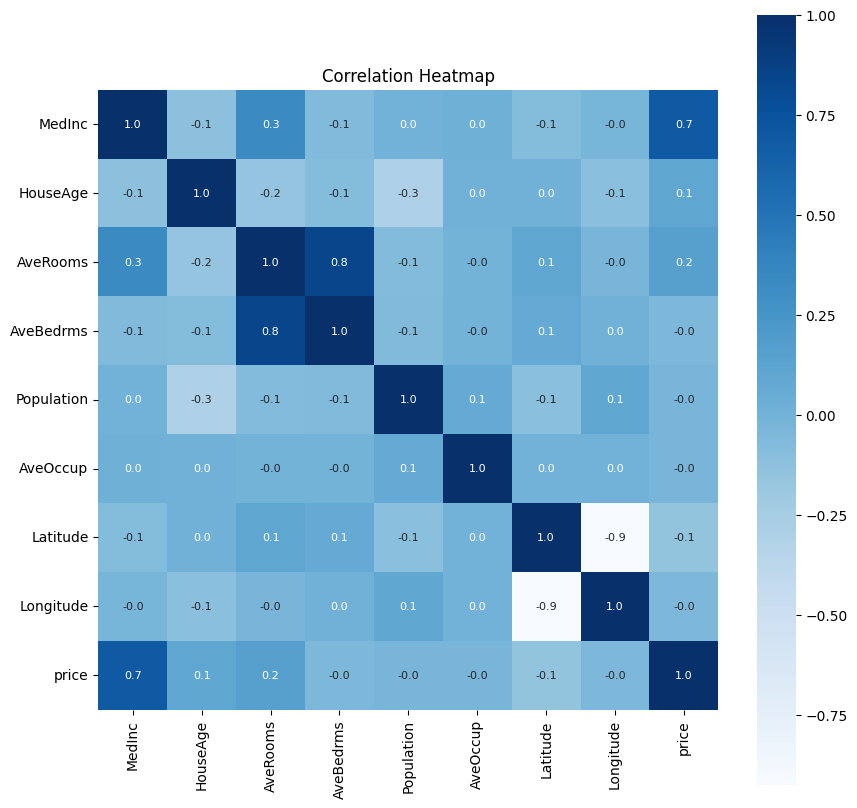

In [ ]:
correlation = house_price_dataframe.corr()

# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Feature Engineering: Adding polynomial features for selected columns
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(house_price_dataframe[['MedInc', 'AveRooms', 'HouseAge']])
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['MedInc', 'AveRooms', 'HouseAge']))

# Concatenating the polynomial features with the original DataFrame
house_price_dataframe = pd.concat([house_price_dataframe.drop(['MedInc', 'AveRooms', 'HouseAge'], axis=1), poly_features_df], axis=1)

In [ ]:
# Removing any duplicate columns that might have been added
house_price_dataframe = house_price_dataframe.loc[:, ~house_price_dataframe.columns.duplicated()]

Splitting the data and Target

In [ ]:
# Splitting the data into Features (X) and Target (Y)
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

Splitting the data into Training data and Test data

In [ ]:
# Splitting the data into Training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Training with XGBoost Regressor
model = XGBRegressor()

In [ ]:
# Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5, verbose=1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [ ]:
# Best parameters from grid search
best_model = grid_search.best_estimator_

In [ ]:
# Prediction on test data
test_data_prediction = best_model.predict(X_test)

In [ ]:
# R squared error for test data
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print(f"R squared error (Test): {score_1}")
print(f"Mean Absolute Error (Test): {score_2}")

R squared error (Test): 0.845017533813377
Mean Absolute Error (Test): 0.2963118071015884


In [ ]:
# Predicting with new input data
# First, generating polynomial features for the new input
new_input = np.array([[8.3014,	21.0,	6.238137]])
new_poly_features = poly.transform(new_input)

In [ ]:
# Concatenating the polynomial features with the remaining features
full_new_input = np.hstack([new_poly_features, np.array([[0.971880,	2401.0,	2.109842,	37.86,	-122.22]])])

In [ ]:
# Scaling the full new input
full_new_input_scaled = scaler.transform(full_new_input)

In [ ]:
# Making the prediction
prediction = best_model.predict(full_new_input_scaled)
print(f"Prediction for new input: {prediction}")

Prediction for new input: [2.8194273]
